# Upper-boundary inflow example

In this example, the upper boundary condition specifies $q=5.55e-4$m$^2$/s  (equivalent to 5cm/hr) for a duration of 5 min, and then $q=0$ while the ponded water runs off the slope.  The rainfall rate is zero and the surface is impermeable.


In [78]:
import gzip
import shutil, os, sys
from os.path import dirname


In [79]:

parent_dir = (dirname(os.getcwd()))

sys.path.append(parent_dir )

    
mymods = ['plot_functions']
for mymod in mymods:
    if mymod in sys.modules: 
        del sys.modules[mymod]

from plot_functions import *



In [71]:
core_file = '/'.join([current_dir,  'sim.pklz' ]) 
f = gzip.open(core_file,'rb')
sim = pickle.load(f) 
f.close()  

sim = pd.Series(sim)


Text(0.5,1,'Hydrograph')

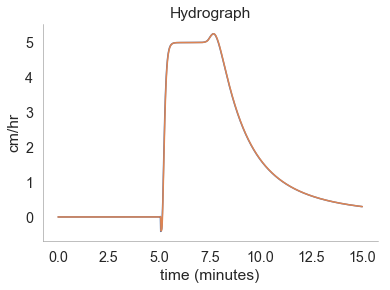

In [72]:
plt.plot(sim['t_h']/60., sim['hydro']*3.6e3)
plt.plot(sim['t_p']/60., sim['flux1']*3.6e3)

plt.xlabel('time (minutes)')
plt.ylabel('cm/hr')
plt.title('Hydrograph')


Text(0.5,0,'x')

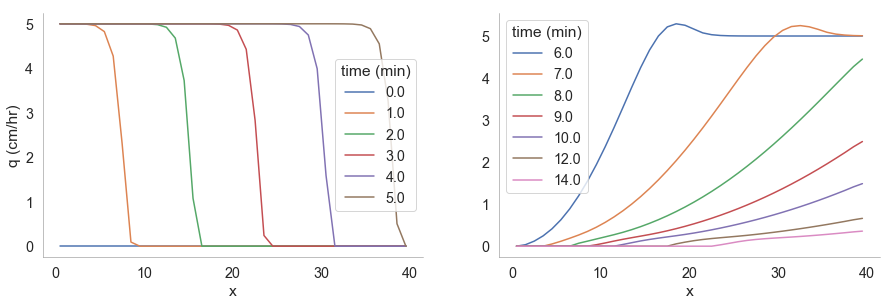

In [73]:
fig = plt.figure(figsize= (15,4.5))
plt.subplots_adjust(wspace = 0.2)

sim['qc'] = sim['hc']*sim['vc']*360000/sim.Ly  # 
t_index = np.arange(len(sim.t_p))

ax1 = plt.subplot(121)
for i in t_index[:360:60]:
    plt.plot(sim.d2divide.mean(0), -sim['qc'].mean(1)[i], label = sim.t_p[i]/60.)
plt.legend(title= "time (min)")
plt.xlabel('x')
plt.ylabel("q (cm/hr)")

ax1 = plt.subplot(122)
for i in t_index[360:600:60]:
    plt.plot(sim.d2divide.mean(0), -sim['qc'].mean(1)[i+6], label = sim.t_p[i]/60.)
for i in t_index[600:-1:120]:
    plt.plot(sim.d2divide.mean(0), -sim['qc'].mean(1)[i+6], label = sim.t_p[i]/60.)

plt.legend(title= "time (min)")
plt.xlabel('x')
 
 

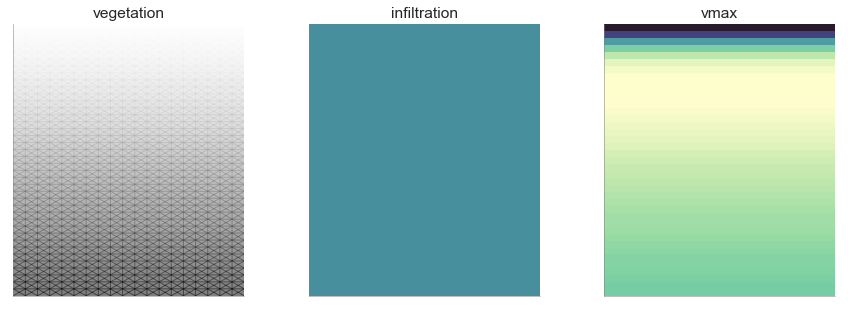

In [75]:
fig = plt.figure(figsize= (15,5))
plt.subplots_adjust(wspace = 0.2)


ax1 = plt.subplot(131)
color_topo(sim.zc, ax = ax1, dx = sim.dx)
veg_points(sim.isvegc, dx  = sim.dx, ax = ax1)
ax1.set_title('vegetation')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(132)
zinflplot = colormap(sim,sim['zinflc'], ax = ax1, clabel= '$I$ (cm)', colorbar = True )
ax1.set_title('infiltration')
# plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(133)
zinflplot = colormap(sim,-sim['vmax'], ax = ax1, clabel= 'velocity (cm/s)' ,
                     veg_scale=False)
ax1.set_title('vmax')

for i, label in enumerate(('veg', 'infl', 'max velocity')):
    ax = plt.subplot(1,3,i+1)
    


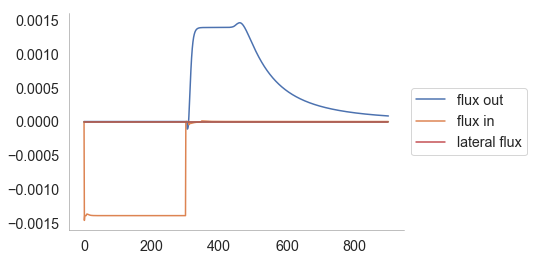

In [77]:
plt.plot(sim.flux1, label = 'flux out')
plt.plot(sim.flux3, label = 'flux in')
plt.plot(sim.flux4)
plt.plot(sim.flux2, label = 'lateral flux')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))